In [1]:
import numpy as np
import pandas as pd
import datetime

In [ ]:
#fun = pd.read_csv('Dataset/fundamentals.csv')
#fun.head()

In [ ]:
#pri = pd.read_csv('Dataset/prices.csv')
#pri.head()

In [2]:
df = pd.read_csv('Dataset/prices-split-adjusted.csv')
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
df.shape

(851264, 7)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

In [5]:
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
#sec = pd.read_csv('Dataset/securities.csv')
#sec.head()

In [6]:
# checking volatility by comparing high low prices
df['HL_PCT'] = (df['high'] - df['low']) / df['low'] * 100

# percenatge change per day
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100

In [7]:
# taking relevant columns
df = df[['open', 'HL_PCT', 'PCT_change', 'volume', 'close']]
df.head()

,open,HL_PCT,PCT_change,volume,close
date,,,,,
2016-01-05,123.430000,3.221325,1.952520,2163600.0,125.839996
2016-01-06,125.239998,4.669000,-4.199932,2386400.0,119.980003
2016-01-07,116.379997,4.185154,-1.228733,2489500.0,114.949997
2016-01-08,115.480003,3.471367,0.987184,2006300.0,116.620003
2016-01-11,117.010002,2.839869,-1.743442,1408600.0,114.970001


In [8]:
from sklearn.model_selection import train_test_split

In [10]:
X = df[['open', 'HL_PCT', 'PCT_change', 'volume']]
y = df['close']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
predictions = lm.predict(X_test)

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.36849692909658444
MSE: 1.0321452669827098
RMSE: 1.0159455039433511


In [18]:
df['close'].mean()

65.01191274222025

In [20]:
0.3685*100/65

0.566923076923077

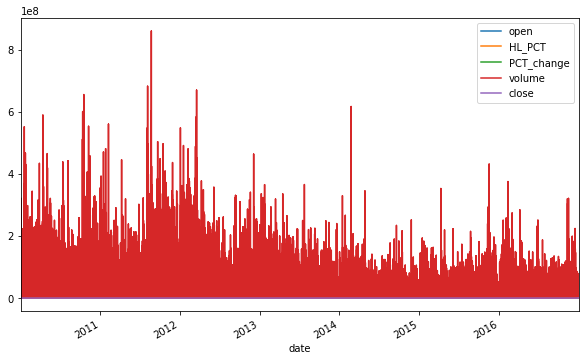

In [26]:
%matplotlib inline
df[:-50].plot(figsize=(10,6))

In [24]:
# print the intercept
print(lm.intercept_)

0.022789884813818162


In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
open,9.999330e-01
HL_PCT,-1.125520e-02
PCT_change,5.623508e-01
volume,2.042322e-10
